In [31]:
import matplotlib.pyplot as plt
import pandas as pd

In [32]:
with open('coordenadas.txt', 'r') as file:
    data = file.readlines()
data = [line.strip().split(',') for line in data]
costa = pd.DataFrame(data[1:], columns=['latitud', 'longitud'])

In [33]:
ciudad = pd.read_csv('M03_01_La_Paz.csv')
ciudad = ciudad['geometry']
ciudad = ciudad.str.extract(r'POLYGON \(\(([^)]+)\)\)')
coordenadas_ciudad = set()
for coords in ciudad[0]:
    puntos = coords.split(', ')
    for punto in puntos:
        lon, lat = map(float, punto.split())
        coordenadas_ciudad.add((lon, lat))

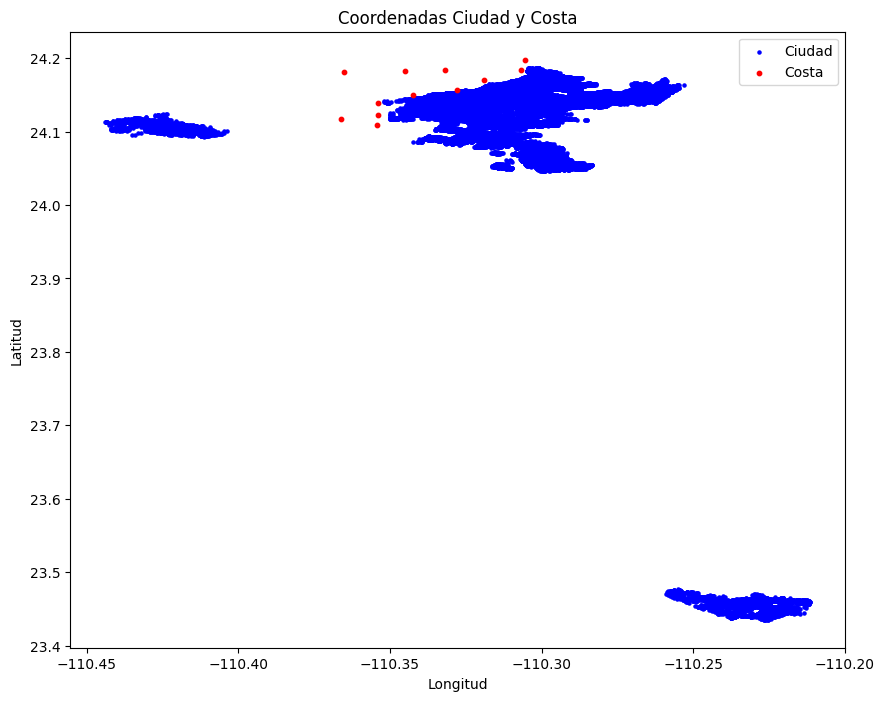

In [34]:
plt.figure(figsize=(10, 8))

# Graficar coordenadas_ciudad en azul
lon_ciudad, lat_ciudad = zip(*coordenadas_ciudad)
plt.scatter(lon_ciudad, lat_ciudad, color='blue', s=5, label='Ciudad')

# Graficar costa en rojo
plt.scatter(costa['longitud'].astype(float), costa['latitud'].astype(float), color='red', s=10, label='Costa')

plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.legend()
plt.title('Coordenadas Ciudad y Costa')
plt.show()

In [35]:
import requests

In [43]:
url = 'https://api.meteomatics.com/{inicio}--{fin}:{intervalo}/t_2m:C/{coordenadas}/html'
inicio = '2023-10-05T00:00:00Z'
fin = '2025-10-05T00:00:00Z'
intervalo = 'PT12H'
coordenadas = ''
usuario = 'hernandezruiz_guillermo'
contraseña = '83Fh9hv7iakCNZhZ88n0'

# leer el archivo de coordenadas, eliminar espacios y remplazar saltos de línea por +
with open('coordenadas.txt', 'r') as file:
    coordenadas = file.read().strip().replace('\n', '+').replace(' ', '')

coordenadas = '24.210841,-110.305163+24.197897,-110.305568'

response = requests.get(url.format(inicio=inicio, fin=fin, intervalo=intervalo, 
                                   coordenadas=coordenadas), auth=(usuario, contraseña))

# guarda el resultado en un archivo HTML
with open('resultado.html', 'w') as file:
    file.write(response.text)

ConnectionError: HTTPSConnectionPool(host='api.meteomatics.com', port=443): Max retries exceeded with url: /2023-10-05T00:00:00Z--2025-10-05T00:00:00Z:PT12H/t_2m:C/24.210841,-110.305163+24.197897,-110.305568/html (Caused by NameResolutionError("<urllib3.connection.HTTPSConnection object at 0x7fe1d1ba51d0>: Failed to resolve 'api.meteomatics.com' ([Errno -3] Temporary failure in name resolution)"))